<a href="https://colab.research.google.com/github/hungcuongthan/ML-DL-Projects/blob/main/CNN/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input,Flatten, Dense,Conv2D, Dropout
from tensorflow.keras.models import Model

2.5.0


In [2]:
fashion_mnist  = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

We have dataset of 60000 of 28x28 images of fashion ascessories.

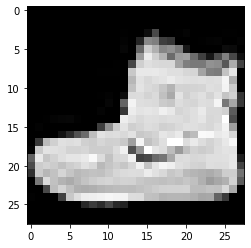

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap = 'gray')
plt.show()


In [5]:
#scale the data set
x_train, x_test = x_train/255.0, x_test/255.0

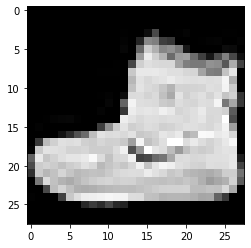

In [6]:
plt.imshow(x_train[0],cmap = 'gray')
plt.show()


In [7]:
#The data is only 2-D
#The convolution layers need  input with dimension: height x width x color

x_train = np.expand_dims(x_train, - 1)
x_test = np.expand_dims(x_test, - 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
#Unique number of classes
K = len(set(y_train))
print("Number of classes: {}".format(K))

Number of classes: 10


In [9]:
#Build the model using functional API
#Increase the number of feature maps after it convolution layer
#Constant filter size of 3x3
#strides = 2, the image dimension gets reduced by half after each convolution
#Flatten layer is to convert the image into a feature vector
#Dropout layers for regularization along with Dense layers

i = Input(shape = x_train[0].shape)
x = Conv2D(filters = 32,kernel_size=(3,3),strides= 2,activation= 'relu')(i)
x = Conv2D(filters = 64,kernel_size=(3,3),strides= 2,activation= 'relu')(x)
x = Conv2D(filters = 128,kernel_size=(3,3),strides= 2,activation= 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation= 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation = "softmax")(x) #Output layer

model = Model(i,x)

In [12]:
#Compile and fit the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1249 - accuracy: 0.9521 - val_loss: 0.4023 - val_accuracy: 0.8992
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1182 - accuracy: 0.9548 - val_loss: 0.3780 - val_accuracy: 0.9020
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1151 - accuracy: 0.9570 - val_loss: 0.3766 - val_accuracy: 0.9019
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9577 - val_loss: 0.3866 - val_accuracy: 0.9017
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1038 - accuracy: 0.9599 - val_loss: 0.4036 - val_accuracy: 0.8966
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1007 - accuracy: 0.9607 - val_loss: 0.4014 - val_accuracy: 0.8995
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0997 - accuracy: 0.9626 - val_loss: 0.4354 - val_accuracy:

We reached 90% accuracy for test set with this model.

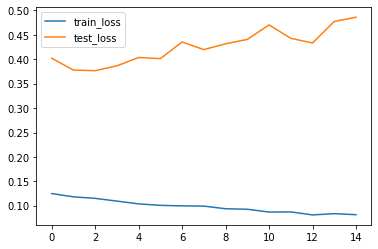

In [16]:
plt.plot(r.history['loss'],label = 'train_loss')
plt.plot(r.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

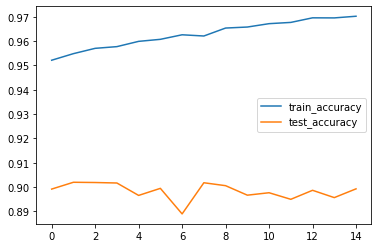

In [17]:
plt.plot(r.history['accuracy'],label = 'train_accuracy')
plt.plot(r.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()